# Predicting Electric vehicle range based on features 

# Table of contents :
1. Introduction
2. Goal Of the Project
3. Data Story
4. Data Preprocessing

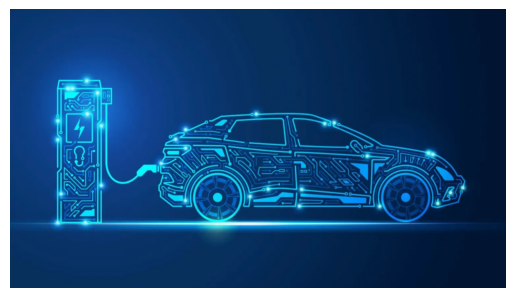

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load an image
img = mpimg.imread("C:\\Users\\ajayc\\Downloads\\1733781781100.png")

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes for a cleaner view
plt.show()

# 1. **Introduction**

The Electric Vehicle population dataset from Washington Technology Solutions (WaTech) is part of the Washington Open Data Program, which allows all state agencies to publish public data at https://data.wa.gov.Categorical features in the dataset are encoded, while numerical features are transformed using the Yeo-Johnson method to correct skewness. Outliers are handled using a capping technique. Five machine learning regression models are implemented: Linear Regression, Decision Tree, Random Forest, K-Nearest Neighbors, and Gradient Boosting. These models are evaluated using performance metrics such as MAE, MSE, R² score, and RMSE. The objective is to identify the best-performing model and the key features that influence electric vehicle range prediction. This analysis can support companies in developing effective sales and marketing strategies.

# 2. **Goal of the Project**

Build a machine learning model that can accurately predict the Electric vehicle range ,using various feature.

# 3.**Data Story/Source**:

The dataset used in this project is the Electric Vehicle Population dataset, originally sourced from Data.gov. It contains 235,692 records and 17 features, comprising both numerical and categorical variables that provide detailed information about electric vehicles in Washington, USA.

Each entry in the dataset represents a vehicle record, with attributes such as VIN (1–10), County, City, State, Postal Code, Model Year, Make, Model, Electric Vehicle Type, Clean Alternative Fuel Vehicle (CAFV) Eligibility, Electric Range, Base MSRP, Legislative District, DOL Vehicle ID, Vehicle Location, Electric Utility, and 2020 Census Tract.

The target variable is Electric Range, which indicates the driving range of each electric vehicle in the dataset.

About dataset

Source of the data is from Data.gov Machine Learning Repository.

Link:https://catalog.data.gov/dataset/electric-vehicle-population-data

# 4. **Data Preprocessing**

1.Importing Libraries

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV 
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint
import joblib

**2. Load the dataset**

In [16]:
df=pd.read_csv("Electric_Vehicle_Population_Data.csv")
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235687,1C4RJXN62R,Pierce,Tacoma,WA,98407.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,27.0,267004272,POINT (-122.51134 47.29238),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
235688,5YJSA1E28J,Snohomish,Stanwood,WA,98292.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249.0,0.0,10.0,198794410,POINT (-122.37265 48.24159),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.306105e+10
235689,3FA6P0SU2F,King,Redmond,WA,98052.0,2015,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,48.0,261742288,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
235690,WA1BCBFZ6P,Snohomish,Lake Stevens,WA,98258.0,2023,AUDI,Q4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,44.0,253474854,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10


# 3.Understand the data structure

In [18]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


In [19]:
print("Dataset info:")
print(df.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235692 entries, 0 to 235691
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         235692 non-null  object 
 1   County                                             235689 non-null  object 
 2   City                                               235689 non-null  object 
 3   State                                              235692 non-null  object 
 4   Postal Code                                        235689 non-null  float64
 5   Model Year                                         235692 non-null  int64  
 6   Make                                               235692 non-null  object 
 7   Model                                              235692 non-null  object 
 8   Electric Vehicle Type                              235692 no

In [20]:
print("Shape of the dataset:")
df.shape

Shape of the dataset:


(235692, 17)

In [21]:
print("Columns of the dataset:")
print(df.columns)

Columns of the dataset:
Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


In [22]:
print("statistical summary:")
print(df.describe())

statistical summary:
         Postal Code     Model Year  Electric Range      Base MSRP  \
count  235689.000000  235692.000000   235656.000000  235656.000000   
mean    98177.656463    2021.406658       46.262569     787.268328   
std      2524.218661       2.991908       84.045829    7177.668305   
min      1731.000000    2000.000000        0.000000       0.000000   
25%     98052.000000    2020.000000        0.000000       0.000000   
50%     98126.000000    2023.000000        0.000000       0.000000   
75%     98374.000000    2024.000000       38.000000       0.000000   
max     99577.000000    2025.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         235198.000000    2.356920e+05       2.356890e+05  
mean              28.879519    2.353127e+08       5.298066e+10  
std               14.904644    6.799098e+07       1.521066e+09  
min                1.000000    4.385000e+03       1.001020e+09  
25%               17.00

In [23]:
print("Null values of the dataset:")
print(df.isnull().sum())

Null values of the dataset:
VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        36
Base MSRP                                             36
Legislative District                                 494
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dty

In [24]:
print("null value percentage:")
null_percentage=(df.isnull().sum()/len(df))*100
print(null_percentage)

null value percentage:
VIN (1-10)                                           0.000000
County                                               0.001273
City                                                 0.001273
State                                                0.000000
Postal Code                                          0.001273
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.015274
Base MSRP                                            0.015274
Legislative District                                 0.209596
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.004243
Electric Utility                               

In [25]:
df.duplicated().sum()

0

In [26]:
# Drop irrelevant columns
columns_to_drop = ['VIN (1-10)', 'DOL Vehicle ID', 'Vehicle Location']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [27]:
df.columns

Index(['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'Electric Utility',
       '2020 Census Tract'],
      dtype='object')

In [28]:
# Handling Null Values
# numerical columns
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].median())
df['Electric Range'] = df['Electric Range'].fillna(df['Electric Range'].median())
df['Base MSRP'] = df['Base MSRP'].fillna(df['Base MSRP'].median())
df['Legislative District'] = df['Legislative District'].fillna(df['Legislative District'].median())
df['2020 Census Tract'] = df['2020 Census Tract'].fillna(df['2020 Census Tract'].median())

In [29]:
# categorical columns
df['County'] = df['County'].fillna(df['County'].mode()[0])
df['City'] = df['City'].fillna(df['City'].mode()[0])
df['Electric Utility'] = df['Electric Utility'].fillna(df['Electric Utility'].mode()[0])

In [30]:
print("Null values of the dataset:")
print(df.isnull().sum())

Null values of the dataset:
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [31]:
# Differentiating Columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print Results
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility']
Numerical Columns: ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', '2020 Census Tract']


# check skewness of the dataset 

In [33]:
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District','2020 Census Tract']

# Compute skewness
skewness_values = df[columns].skew()
print("skewness of the columns:\n",skewness_values)

skewness of the columns:
 Postal Code            -29.436486
Model Year              -1.269370
Electric Range           1.848887
Base MSRP               15.790610
Legislative District    -0.431552
2020 Census Tract      -27.733378
dtype: float64


The dataset is asymmetrical.so we choose IQR method for outlier detection 

In [35]:
# Columns to check for outliers
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District','2020 Census Tract']

# Function to detect outliers using IQR
def detect_outliers_iqr(data, columns):
    outliers = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    return outliers

# Detect outliers
outliers_iqr = detect_outliers_iqr(df, columns)

# Display outliers
for col, outlier_values in outliers_iqr.items():
    print(f"Outliers in {col}:\n{outlier_values}\n")

Outliers in Postal Code:
19        98908.0
31        98908.0
34        98942.0
44        98902.0
51        98908.0
           ...   
235675    99019.0
235676    99206.0
235677    99208.0
235682    99352.0
235683    99362.0
Name: Postal Code, Length: 15349, dtype: float64

Outliers in Model Year:
5         2012
26        2013
28        2013
118       2012
132       2013
          ... 
235445    2013
235486    2012
235498    2013
235518    2013
235678    2013
Name: Model Year, Length: 6455, dtype: int64

Outliers in Electric Range:
0         220.0
1         291.0
5         265.0
8         215.0
9         215.0
          ...  
235656    220.0
235658    259.0
235660    291.0
235681    249.0
235688    249.0
Name: Electric Range, Length: 38754, dtype: float64

Outliers in Base MSRP:
5         59900.0
46        69900.0
56        31950.0
101       44100.0
139       32250.0
           ...   
235566    31950.0
235573    69900.0
235614    52900.0
235621    31950.0
235636    31950.0
Name: Base MSR

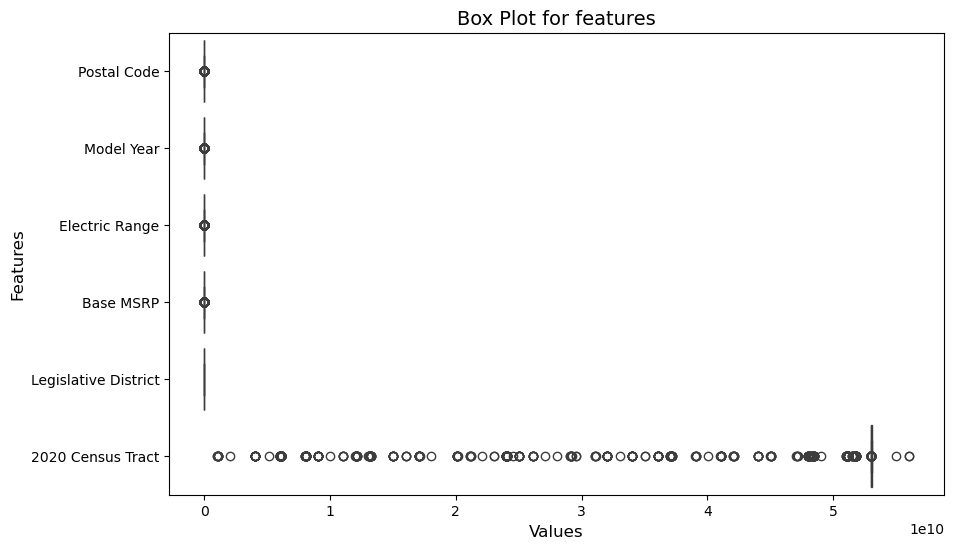

In [36]:
#Visualise the outliers
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District','2020 Census Tract']

# Plotting the Box Plot for Electric Range"
plt.figure(figsize=(10, 6))

# Box plot for Electric Range" (excluding NaN values)
sns.boxplot(df[columns], orient='h')

# Adding title and labels
plt.title('Box Plot for features', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Display the plot
plt.show()

In [37]:
# Using capping method for handling outliers instead of outlier removal
# columns for capping outliers
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District','2020 Census Tract']

# Function to cap outliers
def cap_outliers(df, columns):
    for col in columns:
        lower_bound = df[col].quantile(0.01)
        upper_bound = df[col].quantile(0.99)
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)  # Capping outliers
    return df

# Apply capping
df_capped = cap_outliers(df, columns)

print(df_capped)

           County          City State  Postal Code  Model Year     Make  \
0            King       Seattle    WA      98178.0        2019    TESLA   
1          Kitsap       Poulsbo    WA      98370.0        2020    TESLA   
2          Kitsap        Olalla    WA      98359.0        2023  HYUNDAI   
3          Kitsap       Seabeck    WA      98380.0        2021      BMW   
4        Thurston       Rainier    WA      98576.0        2023   TOYOTA   
...           ...           ...   ...          ...         ...      ...   
235687     Pierce        Tacoma    WA      98407.0        2024     JEEP   
235688  Snohomish      Stanwood    WA      98292.0        2018    TESLA   
235689       King       Redmond    WA      98052.0        2015     FORD   
235690  Snohomish  Lake Stevens    WA      98258.0        2023     AUDI   
235691       King      Issaquah    WA      98027.0        2023      BMW   

             Model                   Electric Vehicle Type  \
0          MODEL 3          Battery E

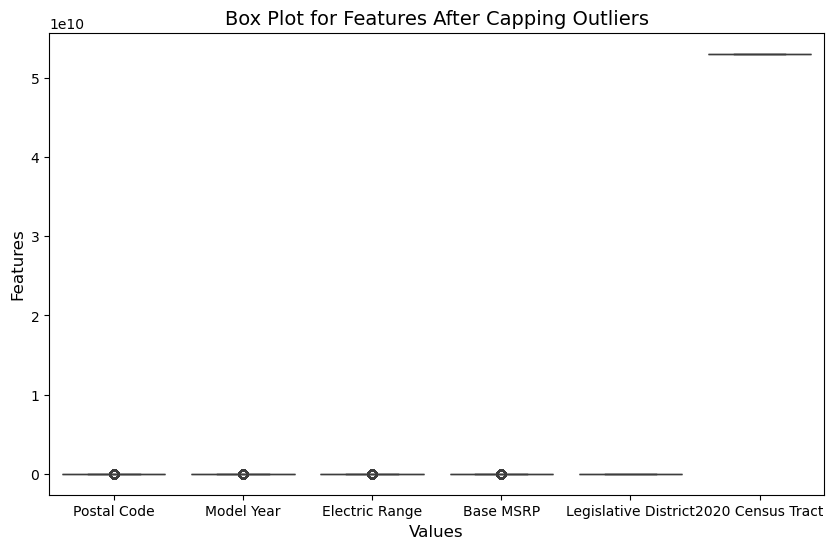

In [38]:
# Plotting the Box Plot after capping
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_capped[columns])  # No 'orient' needed
plt.title('Box Plot for Features After Capping Outliers', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Display the plot
plt.show()

In [39]:
# Data shape after capoing method
df_capped.shape

(235692, 14)

In [40]:
#Check skewness after outlier handling 
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District','2020 Census Tract']

# Compute skewness
skewness_values = df_capped[columns].skew()
print("skewness of the columns:\n",skewness_values)

skewness of the columns:
 Postal Code             1.751481
Model Year             -1.196215
Electric Range          1.831257
Base MSRP               8.406651
Legislative District   -0.431552
2020 Census Tract       0.210353
dtype: float64


In [41]:
# To understand the datatypes of the dataset
df_capped.dtypes

County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
Electric Utility                                      object
2020 Census Tract                                    float64
dtype: object

Skewness of the columns:
 Postal Code             1.751481
Model Year             -1.196215
Electric Range          1.831257
Base MSRP               8.406651
Legislative District   -0.431552
2020 Census Tract       0.210353
dtype: float64


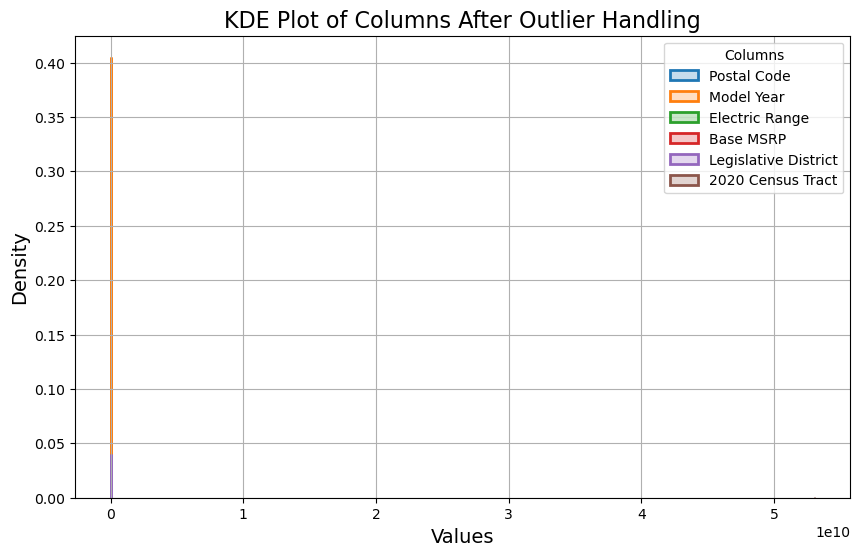

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to check
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District', '2020 Census Tract']

# Compute skewness
skewness_values = df_capped[columns].skew()
print("Skewness of the columns:\n", skewness_values)

# KDE Plot
plt.figure(figsize=(10, 6))

for col in columns:
    sns.kdeplot(df_capped[col], label=col, fill=True, linewidth=2)

plt.title('KDE Plot of Columns After Outlier Handling', fontsize=16)
plt.xlabel('Values', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Columns')
plt.grid(True)
plt.show()


In [43]:
import numpy as np

# List of columns
columns = ['Postal Code', 'Electric Range', 'Base MSRP']

# Apply log transformation (log1p handles zeros well)
df_capped[columns] = df_capped[columns].apply(np.log1p)


# Compute skewness after log transformation
skewness_values = df_capped[columns].skew()
print("Skewness of the columns after log transformation:\n", skewness_values)


Skewness of the columns after log transformation:
 Postal Code       1.743600
Electric Range    0.628256
Base MSRP         8.335578
dtype: float64


In [44]:
import numpy as np

# List of columns
columns = [ 'Model Year',
           'Legislative District']

# Apply square root transformation
df_capped[columns] = df_capped[columns].apply(np.sqrt)

# Compute skewness after square root transformation
skewness_values = df_capped[columns].skew()
print("Skewness of the columns after square root transformation:\n", skewness_values)


Skewness of the columns after square root transformation:
 Model Year             -1.197565
Legislative District   -0.927775
dtype: float64


# Exploratory data analysis (EDA)

In [46]:
df.columns

Index(['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'Electric Utility',
       '2020 Census Tract'],
      dtype='object')

# Uni-variate analysis 

In [48]:
# Taking a random sample of 50,000 rows from the DataFrame df_new
df_random = df_capped.sample(n=50000, random_state=42)  # random_state ensures reproducibility

# Displaying the final dataframe for further analysis and model building
df_random.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility,2020 Census Tract
99117,Clark,Vancouver,WA,11.499709,44.922155,VOLVO,S90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,3.091042,0.0,4.123106,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
71440,King,Normandy Park,WA,11.494425,44.966654,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.000000,0.0,5.744563,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
100012,Snohomish,Arlington,WA,11.495006,44.877611,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,2.995732,0.0,6.244998,PUGET SOUND ENERGY INC,5.306105e+10
91904,Thurston,Olympia,WA,11.497832,44.977772,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.000000,0.0,4.690416,PUGET SOUND ENERGY INC,5.306701e+10
123868,King,Renton,WA,11.493314,44.988888,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,3.258097,0.0,3.316625,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


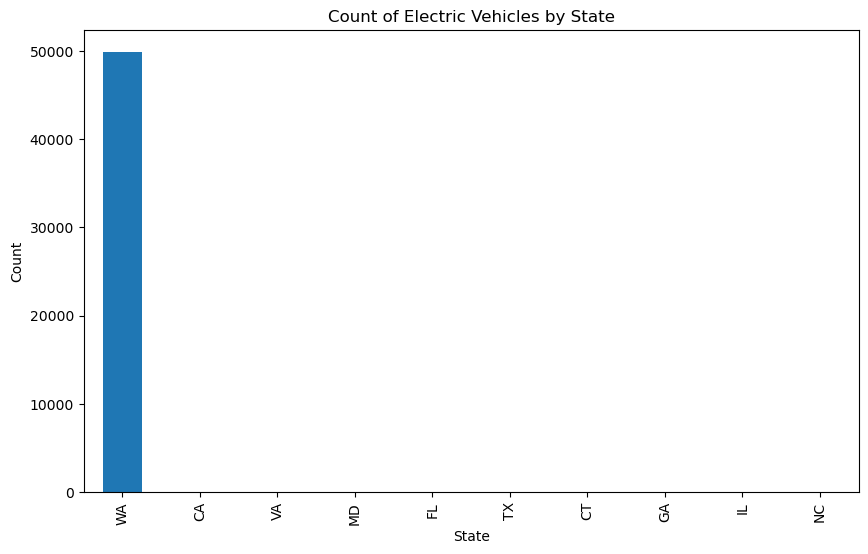

In [49]:
# Distribution of number of Electric Vehicles by State
plt.figure(figsize=(10, 6))
df_random['State'].value_counts().head(10).plot(kind='bar')
plt.title("Count of Electric Vehicles by State")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

The most number of electric vehicles are in WA (Washington state)

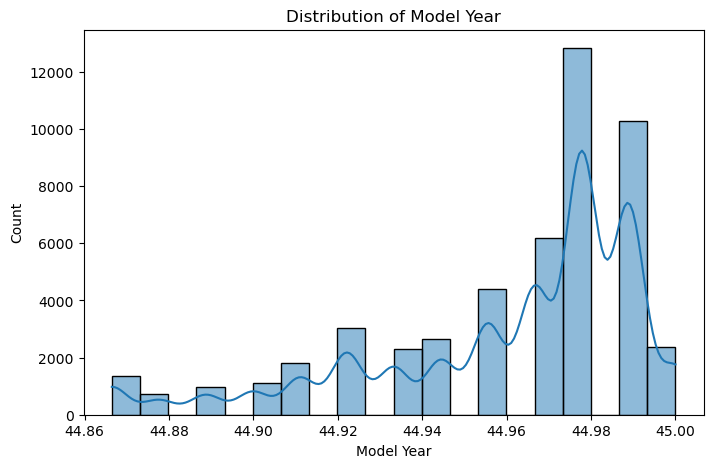

In [51]:
# Distribution of Model Year
plt.figure(figsize=(8, 5))
sns.histplot(df_random['Model Year'], bins=20, kde=True)
plt.title("Distribution of Model Year")
plt.show()

In this diagram, the year 2022 are the most number of electri vehicle produced 

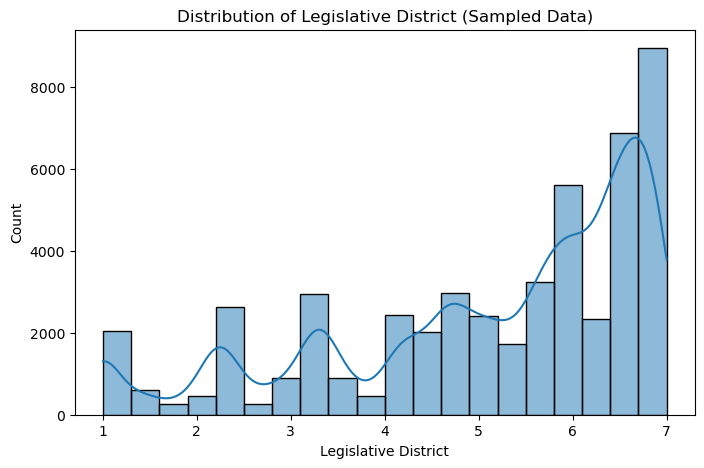

In [53]:
# Histogram of Legislative District
plt.figure(figsize=(8, 5))
sns.histplot(df_random['Legislative District'], bins=20, kde=True)
plt.title("Distribution of Legislative District (Sampled Data)")
plt.show()

In this diagram, the 40-50 of legislative district are the most number of electric vehicles.

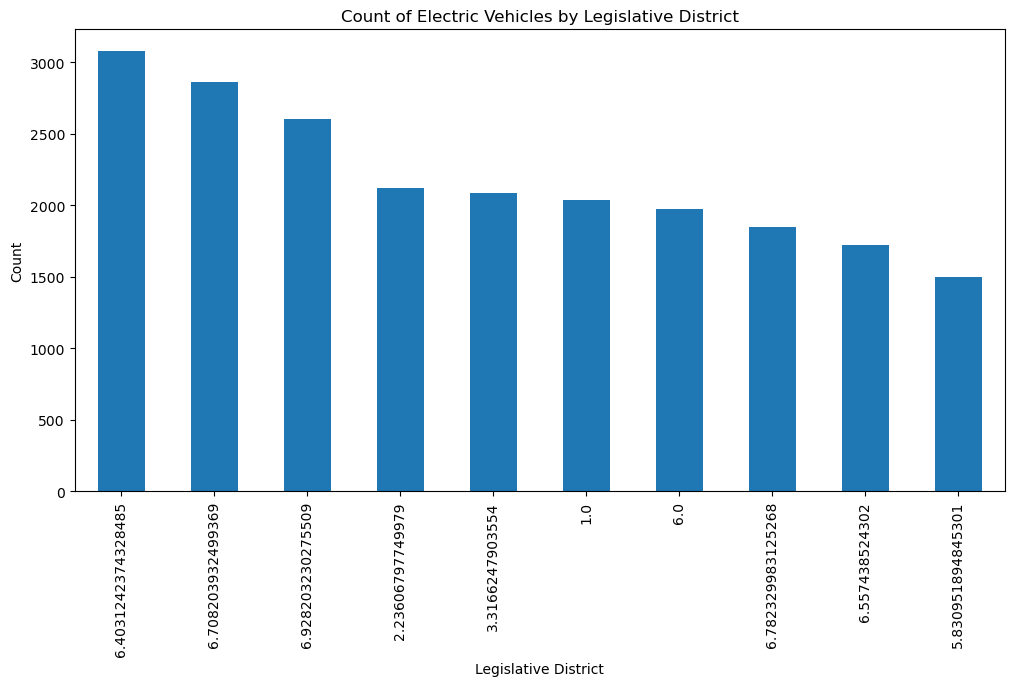

In [55]:
# Top 10 Number of Electric vehicles per Legislative District
plt.figure(figsize=(12, 6))
df_random['Legislative District'].value_counts().head(10).plot(kind='bar')
plt.title("Count of Electric Vehicles by Legislative District")
plt.xlabel("Legislative District")
plt.ylabel("Count")
plt.show()

In this diagram, the 41.0 of legislative district are the most number of electric vehicles.

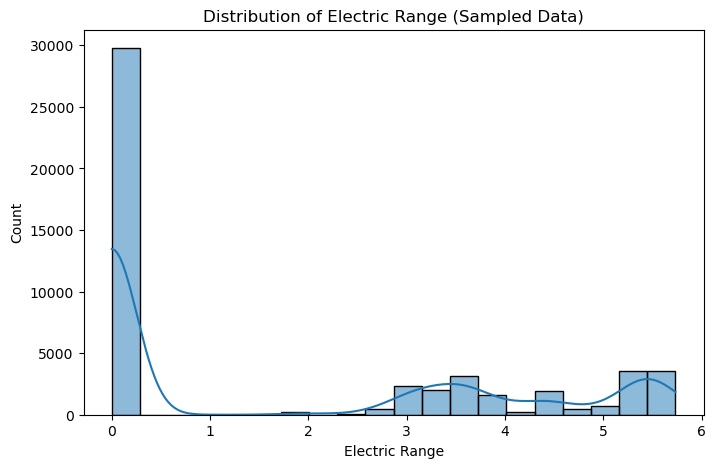

In [57]:
# Histogram of Electric Range with a sample
plt.figure(figsize=(8, 5))
sns.histplot(df_random['Electric Range'], bins=20, kde=True)
plt.title("Distribution of Electric Range (Sampled Data)")
plt.show()

-- Most vehicles have a lower Electric Range, with a few models offering much higher ranges.

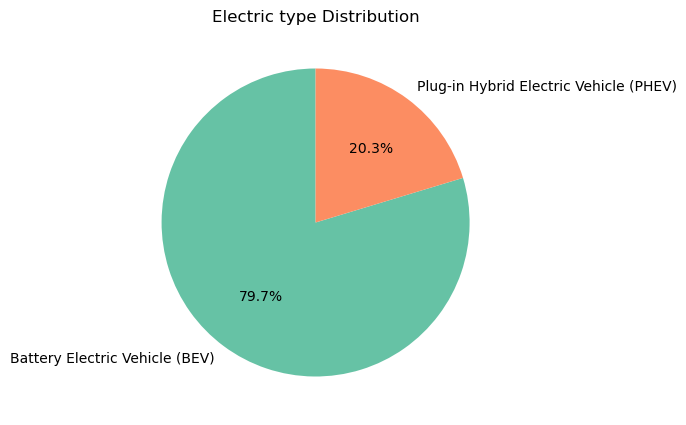

In [59]:
# Pie Diagram for Electric Vehicle Types(percentage distribution)
plt.figure(figsize=(8, 5))
df_random['Electric Vehicle Type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'], startangle=90)
plt.title("Electric type Distribution")
plt.ylabel("")  # Remove y-axis label
plt.show()

In this diagram, most of the electric vehicles are BEV type (Battery electric vehicle-79.7%).

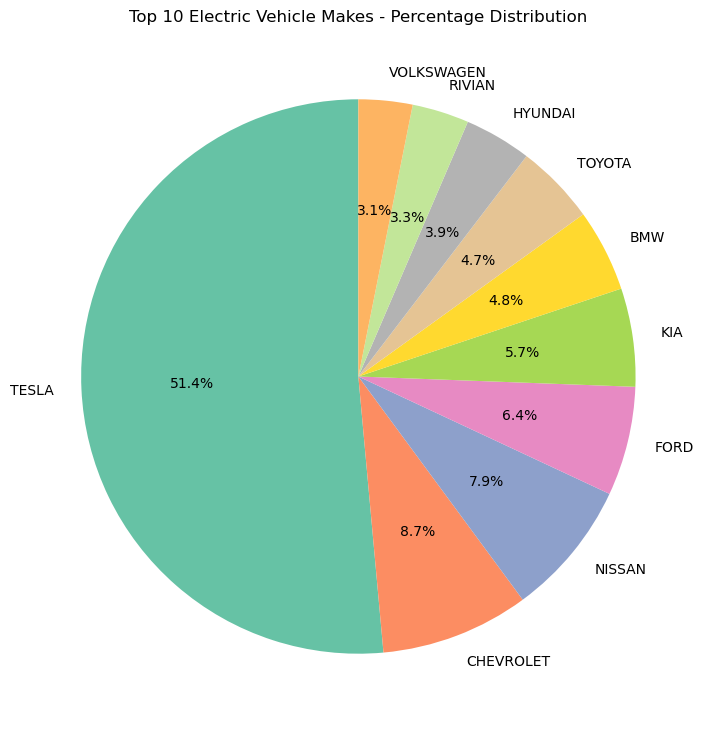

In [61]:
# Pie Chart showing Top 10 Electric Vehicle Makes by Percentage
plt.figure(figsize=(9, 9))
df_random['Make'].value_counts(normalize=True).head(10).plot.pie(
    autopct='%1.1f%%',
    colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3', '#c2e699', '#fdb462'],
    startangle=90
)
plt.title("Top 10 Electric Vehicle Makes - Percentage Distribution")
plt.ylabel("")  # Hides the default y-axis label
plt.show()

Tesla is the most number Electric vehicle makers 51.4%

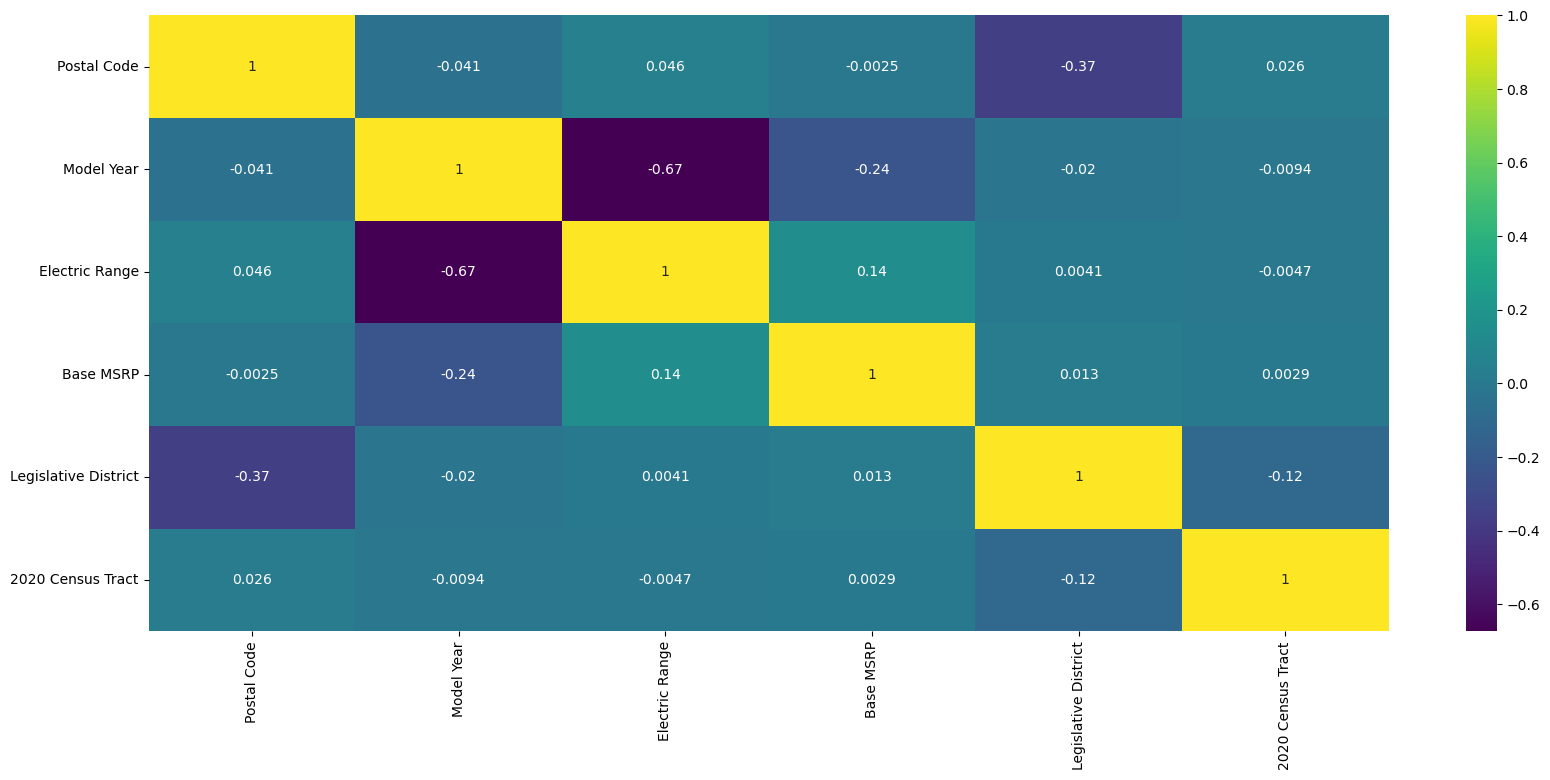

In [63]:
#Correlation matrix : Relationship between the numerical columns 
# Compute the correlation matrix
correlation_matrix = df_random.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

# Formatting
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show plot
plt.show()

-- The correlation matrix shows that some features have moderate relationships, while most numerical columns are weakly correlated with each other. In the correlation metrix, there is no multicollinearity.

# BI-Variate analysis 

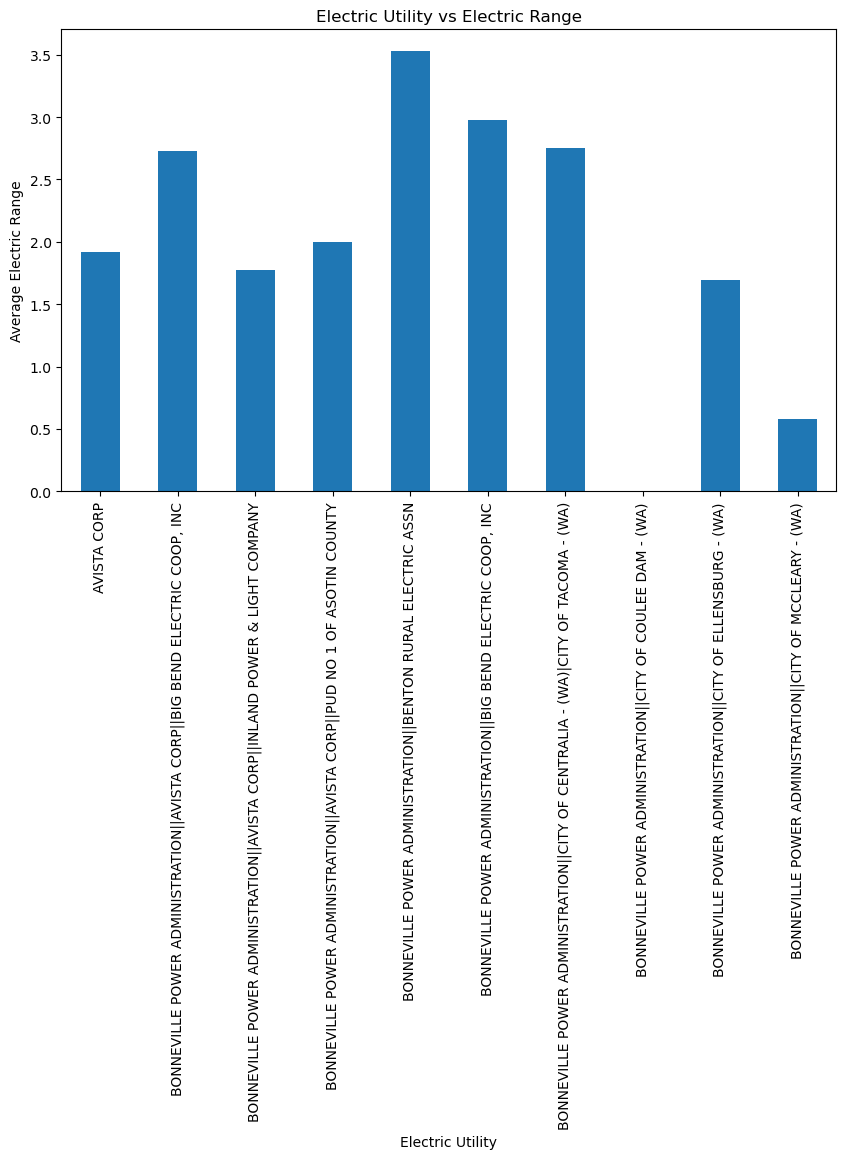

In [66]:
# Top 10 number of Electric Utility vs Electric Range (Bar Chart)
plt.figure(figsize=(10, 6))
df_random.groupby('Electric Utility')['Electric Range'].mean().head(10).plot(kind='bar')
plt.title("Electric Utility vs Electric Range")
plt.xlabel("Electric Utility")
plt.ylabel("Average Electric Range")
plt.xticks(rotation=90)
plt.show()

In this diagram, the BENTON RURAL ELECTRIC ASSN is the highest electric utility provider.It indicate better infrastructure, efficient power supply, or more advanced vehicle models using their services.

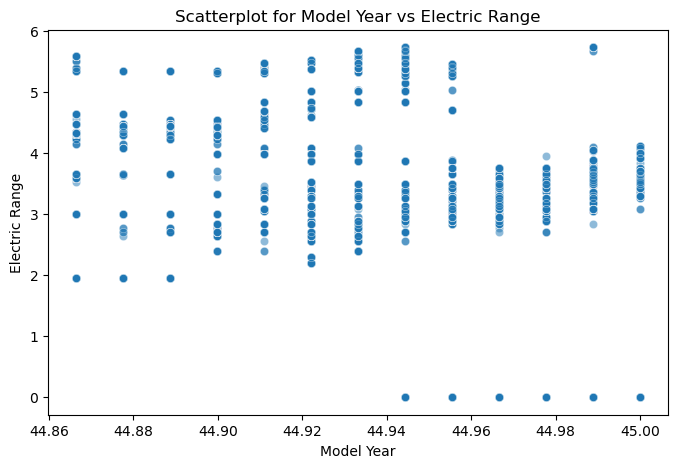

In [68]:
# Relationship between Model Year and Electric Range 
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_random['Model Year'], y=df_random['Electric Range'], alpha=0.5)
plt.title("Scatterplot for Model Year vs Electric Range")
plt.xlabel("Model Year")
plt.ylabel("Electric Range")
plt.show()

The scatterplot shows that newer model years generally have higher electric ranges, indicating technological improvements over time

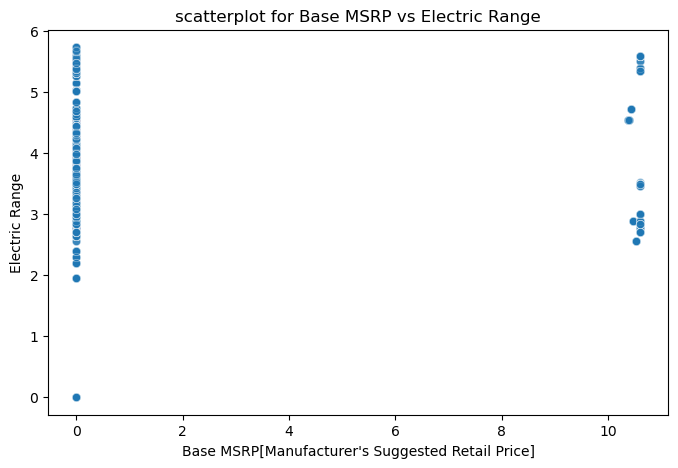

In [70]:
# Base MSRP vs Electric Range
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_random['Base MSRP'], y=df_random['Electric Range'], alpha=0.5)
plt.title("scatterplot for Base MSRP vs Electric Range")
plt.xlabel("Base MSRP[Manufacturer's Suggested Retail Price]")
plt.ylabel("Electric Range")
plt.show()

-- The scatterplot shows that higher-priced vehicles generally tend to have longer electric ranges, but there is considerable variation across different price levels.

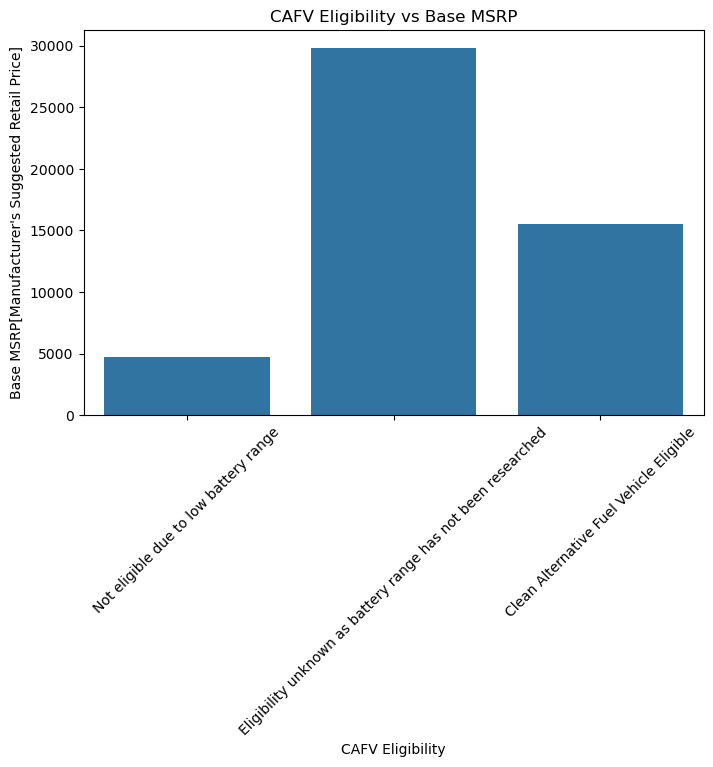

In [72]:
# Clean Alternative Fuel Vehicle (CAFV) Eligibility vs Base MSRP
plt.figure(figsize=(8, 5))
sns.countplot(x=df_random['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
plt.title("CAFV Eligibility vs Base MSRP")
plt.xlabel("CAFV Eligibility")
plt.ylabel("Base MSRP[Manufacturer's Suggested Retail Price]")
plt.xticks(rotation=45)
plt.show()

-- Most vehicles in the sample are eligible for Clean Alternative Fuel Vehicle (CAFV) programs, with fewer vehicles classified as non-eligible.

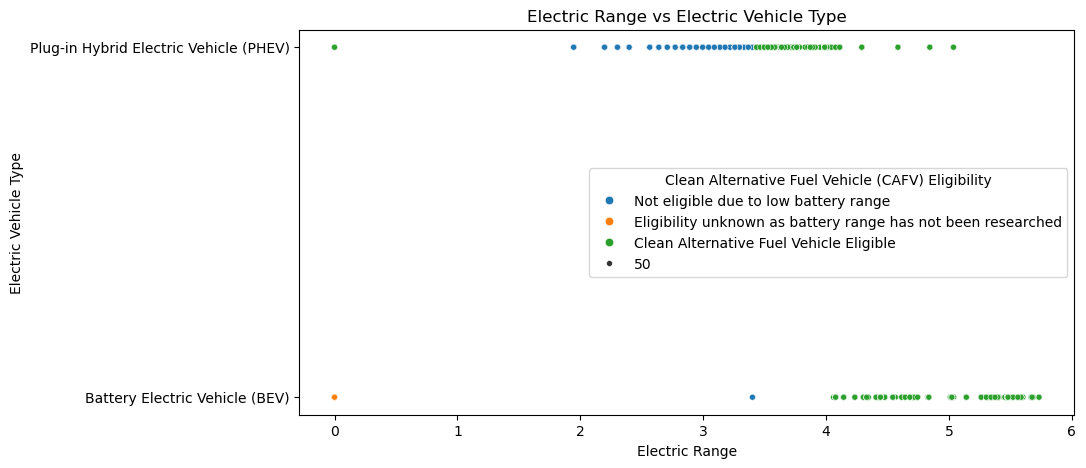

In [74]:
# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=df_random, 
    x="Electric Range", 
    y="Electric Vehicle Type", 
    hue="Clean Alternative Fuel Vehicle (CAFV) Eligibility", 
    size=50  # This is incorrect, should be removed or modified
)

# Title and labels
plt.title('Electric Range vs Electric Vehicle Type')
plt.xlabel("Electric Range")
plt.ylabel("Electric Vehicle Type")

# Show plot
plt.show()

-- The scatter plot shows the relationship between electric range and vehicle type, with colors indicating Clean Alternative Fuel Vehicle (CAFV) eligibility. There is no meaningful size variation in the points due to the incorrect use of the size parameter.

# multivariate analysis

<Axes: >

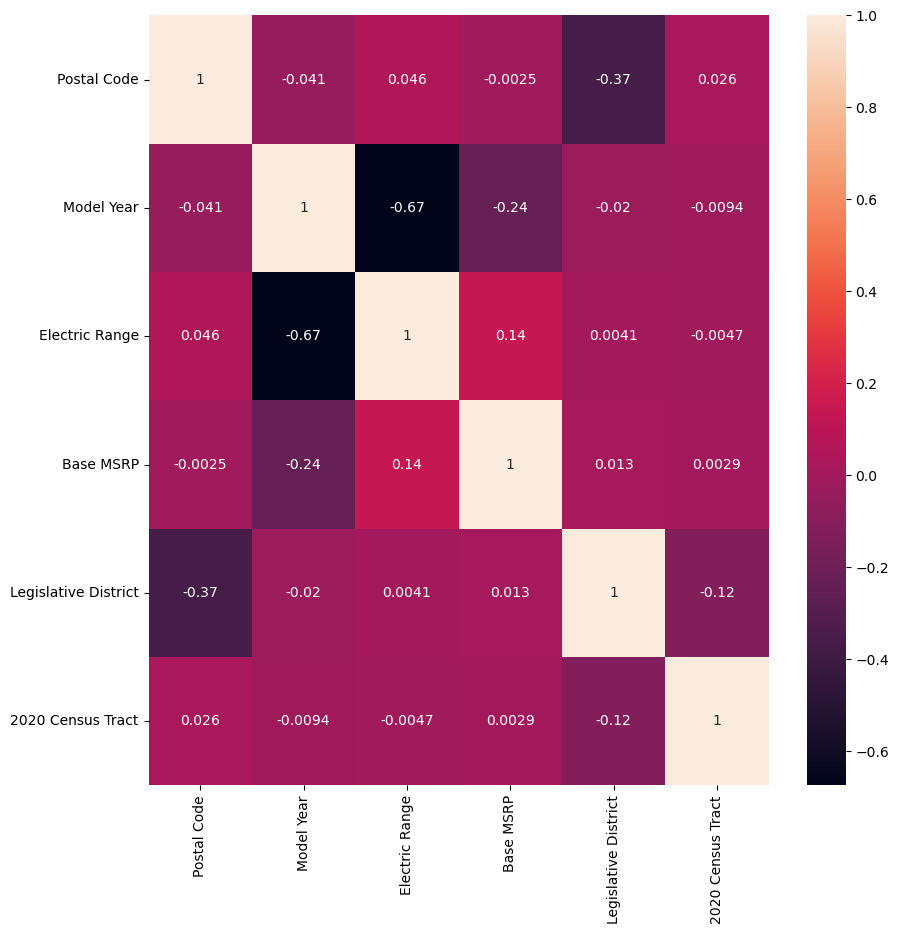

In [77]:
correlation_matrix = df_random.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix,annot=True)

-- The heatmap shows the correlation between numeric variables, highlighting which variables are strongly or weakly related to each other.

# Encoding categorical data

In [80]:
categorical_columns=df_capped.select_dtypes(include=["object","category"]).columns.tolist()

print("Categorical_columns:",categorical_columns)

Categorical_columns: ['County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility']


In [81]:
import pandas as pd

# Assuming df_capped is already defined and the target column is named 'target'
categorical_columns = df_capped.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical_columns:", categorical_columns)

# Target encoding for each categorical column
for col in categorical_columns:
    # Calculate mean of target for each category
    target_mean = df_capped.groupby(col)['Electric Range'].mean()
    # Map the mean target to the original column
    df_capped[col + '_target_enc'] = df_capped[col].map(target_mean)

df_capped.head()
# Optionally drop the original categorical columns
# df_capped.drop(columns=categorical_columns, inplace=True)


Categorical_columns: ['County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility']


,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,...,Electric Utility,2020 Census Tract,County_target_enc,City_target_enc,State_target_enc,Make_target_enc,Model_target_enc,Electric Vehicle Type_target_enc,Clean Alternative Fuel Vehicle (CAFV) Eligibility_target_enc,Electric Utility_target_enc
0,King,Seattle,WA,11.494548,44.933284,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,5.398163,...,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,1.667922,1.823852,1.741785,1.370054,2.081009,1.315182,4.666095,1.811334
1,Kitsap,Poulsbo,WA,11.496501,44.944410,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,5.676754,...,PUGET SOUND ENERGY INC,5.303509e+10,1.915357,2.043248,1.741785,1.370054,0.272583,1.315182,4.666095,1.685687
2,Kitsap,Olalla,WA,11.496389,44.977772,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.000000,...,PUGET SOUND ENERGY INC,5.303509e+10,1.915357,1.201196,1.741785,0.771093,0.000000,1.315182,0.000000,1.685687
3,Kitsap,Seabeck,WA,11.496603,44.955534,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,3.433987,...,PUGET SOUND ENERGY INC,5.303509e+10,1.915357,1.796044,1.741785,2.383125,3.399547,3.382774,4.666095,1.685687
4,Thurston,Rainier,WA,11.498593,44.977772,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,3.761200,...,PUGET SOUND ENERGY INC,5.306701e+10,1.895613,2.145491,1.741785,2.902048,3.761200,3.382774,4.666095,1.685687


In [82]:
# Drop irrelevant columns
columns_to_drop = ['County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Utility']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [83]:
df_capped.columns

Index(['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', '2020 Census Tract', 'County_target_enc',
       'City_target_enc', 'State_target_enc', 'Make_target_enc',
       'Model_target_enc', 'Electric Vehicle Type_target_enc',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility_target_enc',
       'Electric Utility_target_enc'],
      dtype='object')

In [84]:
df_capped.shape 

(235692, 14)

In [85]:
# Selecting the first 100 rows
correlation_matrix = df_capped.corr(numeric_only=True)
print(correlation_matrix.corr()["Electric Range"].sort_values(ascending=False))

Electric Range                                                  1.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility_target_enc    0.996143
Model_target_enc                                                0.942366
Make_target_enc                                                 0.710760
Electric Vehicle Type_target_enc                                0.691854
Base MSRP                                                       0.244464
City_target_enc                                                 0.011387
County_target_enc                                              -0.064793
Postal Code                                                    -0.065940
Legislative District                                           -0.067932
Electric Utility_target_enc                                    -0.072545
2020 Census Tract                                              -0.132285
State_target_enc                                               -0.137388
Model Year                                         

# Feature selection

In [87]:
X = df_capped.drop(columns=["Electric Range"])  # Features
y = df_capped["Electric Range"]  # Target

select_k = SelectKBest(score_func=f_classif, k=4)  # Selecting top 10 features
X_selected = select_k.fit_transform(X, y)

# Get selected feature names and scores
selected_features = X.columns[select_k.get_support()]
selected_scores = select_k.scores_[select_k.get_support()]

print("Selected Features:\n", selected_features)
print("Feature Scores based on select_k:\n", selected_scores)

Selected Features:
 Index(['Model Year', 'Model_target_enc', 'Electric Vehicle Type_target_enc',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility_target_enc'],
      dtype='object')
Feature Scores based on select_k:
 [   9533.13581753    5020.60033125  948824.66698373 3114706.8780487 ]


For model building and evaluation, I chose 50,000 rows from the dataset because it contains more than 200,000 rows, and processing the entire dataset takes too much time.

In [89]:
# Taking a random sample of 50,000 rows 
df_sample= df_capped.sample(n=50000, random_state=42)  # random_state ensures reproducibility

# Displaying the final dataframe for further analysis and model building
df_sample.head()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,2020 Census Tract,County_target_enc,City_target_enc,State_target_enc,Make_target_enc,Model_target_enc,Electric Vehicle Type_target_enc,Clean Alternative Fuel Vehicle (CAFV) Eligibility_target_enc,Electric Utility_target_enc
99117,11.499709,44.922155,3.091042,0.0,4.123106,5.301104e+10,1.854945,1.879886,1.741785,2.189079,3.234172,3.382774,3.031446,1.853361
71440,11.494425,44.966654,0.000000,0.0,5.744563,5.303303e+10,1.667922,2.157755,1.741785,1.370054,0.272583,1.315182,0.000000,1.591271
100012,11.495006,44.877611,2.995732,0.0,6.244998,5.306105e+10,1.518212,1.817825,1.741785,1.005898,3.060149,3.382774,3.031446,1.685687
91904,11.497832,44.977772,0.000000,0.0,4.690416,5.306701e+10,1.895613,1.945691,1.741785,0.835673,0.000000,1.315182,0.000000,1.685687
123868,11.493314,44.988888,3.258097,0.0,3.316625,5.303303e+10,1.667922,1.699624,1.741785,3.144377,3.258097,3.382774,3.031446,1.591271


# Split Data into Training and Testing Sets

In [91]:
X = df_capped.drop(columns=["Electric Range"])  # Features
y = df_capped["Electric Range"]  # Target

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X_selected,y,test_size=0.2,random_state=42)

print("\n Training data (Features):")
print(X_train)
print("\n Testing data (Features):")
print(X_test)


 Training data (Features):
[[44.95553359  3.10800182  3.3827744   3.03144645]
 [44.86646855  3.44892074  1.31518188  4.66609474]
 [44.97777229  2.75204149  1.31518188  0.        ]
 ...
 [44.98888752  0.          1.31518188  0.        ]
 [44.97777229  0.          1.31518188  0.        ]
 [45.          0.          1.31518188  0.        ]]

 Testing data (Features):
[[44.92215489  3.23417225  3.3827744   3.03144645]
 [44.96665431  0.27258284  1.31518188  0.        ]
 [44.87761134  3.06014917  3.3827744   3.03144645]
 ...
 [44.98888752  3.55534806  3.3827744   4.66609474]
 [45.          2.08100926  1.31518188  0.        ]
 [44.96665431  2.08100926  1.31518188  0.        ]]


In [93]:
X_train.shape 

(188553, 4)

In [94]:
X_test.shape 

(47139, 4)

# Feature scaling 

In [96]:
scaler_standard=StandardScaler()
X_train_scaled=scaler_standard.fit_transform(X_train)
X_test_scaled=scaler_standard.transform(X_test)

In [97]:
print("\n  X _train_scaled:")
print(X_train_scaled)
print("\n X_test_scaled:")
print(X_test_scaled)


  X _train_scaled:
[[-0.14165645  0.8747442   1.95564526  0.59869751]
 [-2.85349861  1.0936261  -0.51134018  1.35920154]
 [ 0.53546503  0.6462052  -0.51134018 -0.81165311]
 ...
 [ 0.87390026 -1.12070191 -0.51134018 -0.81165311]
 [ 0.53546503 -1.12070191 -0.51134018 -0.81165311]
 [ 1.21225188 -1.12070191 -0.51134018 -0.81165311]]

 X_test_scaled:
[[-1.15796718  0.95575004  1.95564526  0.59869751]
 [ 0.19694615 -0.94569417 -0.51134018 -0.81165311]
 [-2.51422401  0.84402112  1.95564526  0.59869751]
 ...
 [ 0.87390026  1.16195617  1.95564526  1.35920154]
 [ 1.21225188  0.21537898 -0.51134018 -0.81165311]
 [ 0.19694615  0.21537898 -0.51134018 -0.81165311]]


# Model training 

In [99]:
models={
       "Linear Regression": LinearRegression(),
       "Decision Tree Regressor": DecisionTreeRegressor(),
       "K-Nearest Neighbour Regressor":KNeighborsRegressor(),
       "Random Forest Regressor": RandomForestRegressor(),
       "Gradient Boosting Regressor":GradientBoostingRegressor()
}

# Model Evaluation

In [101]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [102]:
model_results={}
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    predictions=model.predict(X_test_scaled)
    mae=mean_absolute_error(y_test,predictions)
    mse=mean_squared_error(y_test,predictions)
    r2=r2_score(y_test,predictions)
    # rmse=mean_squared_error(y_test,predictions,squared=False)
    rmse = np.sqrt(mse)
    model_results[name]={"MAE":mae,"MSE":mse,"R2":r2,"RMSE":rmse}

# calculate evaluation metrics

In [104]:
for name,metrics in model_results.items():
    print(f"\n{name} performance:")
    for metric,value in metrics.items():
        print(f"{metric}:{value:.4f}")


Linear Regression performance:
MAE:0.2243
MSE:0.1227
R2:0.9747
RMSE:0.3503

Decision Tree Regressor performance:
MAE:0.0029
MSE:0.0006
R2:0.9999
RMSE:0.0241

K-Nearest Neighbour Regressor performance:
MAE:0.0034
MSE:0.0009
R2:0.9998
RMSE:0.0302

Random Forest Regressor performance:
MAE:0.0029
MSE:0.0006
R2:0.9999
RMSE:0.0241

Gradient Boosting Regressor performance:
MAE:0.0299
MSE:0.0061
R2:0.9987
RMSE:0.0779


# To find overfitting in the models 

In [106]:
# Overfitting Linear regression using Ridge (L2 regularization)
lin_reg = Ridge(alpha=0.1, max_iter=1000)
lin_reg.fit(X_train_scaled, y_train)
y_train_pred = lin_reg.predict(X_train_scaled)
y_test_pred = lin_reg.predict(X_test_scaled)

In [107]:
print("Overfitted Linear Regression - Train Accuracy:", r2_score(y_train, y_train_pred))
print("Linear Regression with L2 - Test Accuracy:", r2_score(y_test, y_test_pred))

Overfitted Linear Regression - Train Accuracy: 0.9742646058525546
Linear Regression with L2 - Test Accuracy: 0.9746837793913611


In [108]:
#Overfitting K-Nearest Neighbour Regression 
KNN_reg=KNeighborsRegressor(n_neighbors=4)
KNN_reg.fit(X_train_scaled, y_train)
y_train_pred = KNN_reg.predict(X_train_scaled)
y_test_pred = KNN_reg.predict(X_test_scaled)

In [109]:
print("Overfitted K-Nearest Neighbour Regressor- Train Accuracy:", r2_score(y_train, y_train_pred))
print("K-Nearest Neighbour Regressor - Test Accuracy:", r2_score(y_test, y_test_pred))

Overfitted K-Nearest Neighbour Regressor- Train Accuracy: 0.9998234413803262
K-Nearest Neighbour Regressor - Test Accuracy: 0.9998127342508868


In [110]:
#Overfitting Decision tree Regression 
Dec_reg=DecisionTreeRegressor(random_state=42,max_depth=6,min_samples_split=10,min_samples_leaf=5)
Dec_reg.fit(X_train_scaled, y_train)
y_train_pred = Dec_reg.predict(X_train_scaled)
y_test_pred = Dec_reg.predict(X_test_scaled)

In [111]:
print("Overfitted DecisionTree Regression - Train Accuracy:", r2_score(y_train, y_train_pred))
print("Overfitted DecisionTree Regression - Test Accuracy:", r2_score(y_test, y_test_pred))

Overfitted DecisionTree Regression - Train Accuracy: 0.9979802759580805
Overfitted DecisionTree Regression - Test Accuracy: 0.9980217325110007


In [112]:
# Overfitting Random forest Regression 
Random_reg=RandomForestRegressor(random_state=42)
Random_reg.fit(X_train_scaled, y_train)
y_train_pred = Random_reg.predict(X_train_scaled)
y_test_pred = Random_reg.predict(X_test_scaled)

In [113]:
print("Overfitted Random Forest Regression - Train Accuracy:", r2_score(y_train, y_train_pred))
print("Overfitted Random Forest Regression - Test Accuracy:", r2_score(y_test, y_test_pred))

Overfitted Random Forest Regression - Train Accuracy: 0.9998838302035983
Overfitted Random Forest Regression - Test Accuracy: 0.9998803901244347


In [114]:
#Overfitting Gradient boosting Regression 
GB_reg=GradientBoostingRegressor(n_estimators=100,random_state=100,max_features=4)
GB_reg.fit(X_train_scaled,y_train)
y_train_pred = GB_reg.predict(X_train_scaled)
y_test_pred = GB_reg.predict(X_test_scaled)

In [115]:
print("Overfitted Gradient Boosting Regression - Train Accuracy:", r2_score(y_train, y_train_pred))
print("Overfitted Gradient Boosting Regression - Test Accuracy:", r2_score(y_test, y_test_pred))

Overfitted Gradient Boosting Regression - Train Accuracy: 0.9986648945614204
Overfitted Gradient Boosting Regression - Test Accuracy: 0.9987492604837944


# CROSS VALIDATION

In [118]:
# Define models in a dictionary
model2 = {
       "Linear Regression": LinearRegression(),
       "Decision Tree Regressor": DecisionTreeRegressor(),
       "K-Nearest Neighbour Regressor":KNeighborsRegressor(),
       "Random Forest Regressor": RandomForestRegressor(),
       "Gradient Boosting Regressor":GradientBoostingRegressor()
}

# Define the cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for each model
for name, model in model2.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='r2')
    print(f"{name} - Cross-Validation R² Scores: {scores}")
    print(f"{name} - Mean R² Score: {np.mean(scores):.4f}")
    print("-" * 50)


Linear Regression - Cross-Validation R² Scores: [0.97433392 0.97428156 0.9738638  0.97466086 0.97417006]
Linear Regression - Mean R² Score: 0.9743
--------------------------------------------------
Decision Tree Regressor - Cross-Validation R² Scores: [0.99980208 0.99987114 0.999783   0.99994798 0.99994499]
Decision Tree Regressor - Mean R² Score: 0.9999
--------------------------------------------------
K-Nearest Neighbour Regressor - Cross-Validation R² Scores: [0.99974144 0.99984118 0.99962204 0.99992699 0.99989421]
K-Nearest Neighbour Regressor - Mean R² Score: 0.9998
--------------------------------------------------
Random Forest Regressor - Cross-Validation R² Scores: [0.99980197 0.99987124 0.99978249 0.99994803 0.99994411]
Random Forest Regressor - Mean R² Score: 0.9999
--------------------------------------------------
Gradient Boosting Regressor - Cross-Validation R² Scores: [0.99858019 0.99863378 0.9985264  0.99895407 0.99865102]
Gradient Boosting Regressor - Mean R² Score: 

In [119]:
model_results2={}
for name,model in model2.items():
    model.fit(X_train_scaled,y_train)
    predictions=model.predict(X_test_scaled)
    mae=mean_absolute_error(y_test,predictions)
    mse=mean_squared_error(y_test,predictions)
    r2=r2_score(y_test,predictions)
    # rmse=mean_squared_error(y_test,predictions,squared=False)
    rmse = np.sqrt(mse)
    model_results2[name]={"MAE":mae,"MSE":mse,"R2":r2,"RMSE":rmse}

In [120]:
for name,metrics in model_results2.items():
    print(f"\n{name} performance:")
    for metric,value in metrics.items():
        print(f"{metric}:{value:.4f}")


Linear Regression performance:
MAE:0.2243
MSE:0.1227
R2:0.9747
RMSE:0.3503

Decision Tree Regressor performance:
MAE:0.0029
MSE:0.0006
R2:0.9999
RMSE:0.0241

K-Nearest Neighbour Regressor performance:
MAE:0.0034
MSE:0.0009
R2:0.9998
RMSE:0.0302

Random Forest Regressor performance:
MAE:0.0029
MSE:0.0006
R2:0.9999
RMSE:0.0241

Gradient Boosting Regressor performance:
MAE:0.0299
MSE:0.0061
R2:0.9987
RMSE:0.0779


After the cross validation the metrics are remains same.

In [122]:
best_model = max(model_results2, key=lambda x: (model_results2[x]['R2'], -model_results2[x]['MAE']))
worst_model = min(model_results2, key=lambda x: (model_results2[x]['R2'], -model_results2[x]['MAE']))

print("Best model:", best_model, model_results2[best_model])
print("Worst model:", worst_model, model_results2[worst_model])


Best model: Decision Tree Regressor {'MAE': 0.00290162864140031, 'MSE': 0.0005790435120516165, 'R2': 0.9998805554813633, 'RMSE': 0.0240633229636228}
Worst model: Linear Regression {'MAE': 0.2243001897735668, 'MSE': 0.1227280390200726, 'R2': 0.9746837824120781, 'RMSE': 0.35032561856089345}


In [123]:
Dec_reg.fit(X_train_scaled, y_train)
y_train_pred = Dec_reg.predict(X_train_scaled)
y_test_pred = Dec_reg.predict(X_test_scaled)

print("Overfitted DecisionTree Regression - Train Accuracy:", r2_score(y_train, y_train_pred))
print("Overfitted DecisionTree Regression - Test Accuracy:", r2_score(y_test, y_test_pred))

Overfitted DecisionTree Regression - Train Accuracy: 0.9979802759580805
Overfitted DecisionTree Regression - Test Accuracy: 0.9980217325110007


After the performance evaluation 
--- DecisionTree  Regressor is the best model  
--- Linear Regressor is the worst model ,compared to other models with R2 score.

# Hyper parameter tuning 

Perform hyperparameter tuning in the Decision tree regression model to check whether the performance of the model has increased.

In [205]:

param_dist = { 
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20), 
    'min_samples_leaf': randint(1, 20), 
    'random_state': [42], 
}

random_search = RandomizedSearchCV(DecisionTreeRegressor(), param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train_scaled, y_train)

print("Best Params (Random Search):", random_search.best_params_)


Best Params (Random Search): {'max_depth': 18, 'min_samples_leaf': 2, 'min_samples_split': 14, 'random_state': 42}


In [ ]:
best_params= random_search.best_params_

# Pipeline building

In [207]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import category_encoders as ce
# Splitting the data to features and target. 'df' is the dataframe.
X = df_capped.drop(columns=["Electric Range"])  # Features
y = df_capped["Electric Range"]  # Target variable

# Example column names
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', ce.TargetEncoder(), categorical_features)
    ]
)

# Final pipeline with preprocessing + RandomForestRegressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Example train-test split (assuming X, y already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict
# y_pred = pipeline.predict(X_test)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Postal Code', 'Model Year', 'Base MSRP', 'Legislative District',
       '2020 Census Tract', 'County_target_enc', 'City_target_enc',
       'State_target_enc', 'Make_target_enc', 'Model_target_enc',
       'Electric Vehicle Type_target_enc',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility_target_enc',
       'Electric Utility_target_enc'],
      dtype='object')),
                                                 ('cat', TargetEncoder(),
                                                  Index([], dtype='object'))])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [211]:
from sklearn.pipeline import Pipeline
joblib.dump(pipeline,"Electric vehicle range prediction model6.pkl")
print("model saved sucessfully.")

model saved sucessfully.


In [213]:
# Saving the Pipeline
joblib.dump(pipeline, 'Electric_vehicle_range_pipeline.joblib')
print("Pipeline saved successfully!")

Pipeline saved successfully!


# Model saving

# Unseen data check

In [215]:
pipeline = joblib.load("Electric vehicle range prediction model6.pkl")

In [217]:
# Load the dataset
unseen_df = pd.read_excel("unseen data - Copy.xlsx")
unseen_df.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility,2020 Census Tract
0,Thurston,Olympia,WA,98502,2015,TESLA,MODEL Y,'Battery Electric Vehicle (BEV),Not eligible due to low battery range,80,87000,22,PUGET SOUND ENERGY INC,53067010520
1,Thurston,Olympia,WA,98512,2022,CHEVROLET,VOLT,'Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,53,64000,35,PUGET SOUND ENERGY INC,53067011810
2,Kitsap,Poulsbo,WA,98370,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,50,120000,23,PUGET SOUND ENERGY INC,53035940100
3,King,Bothell,WA,98011,2023,TESLA,MODEL 3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,215,870000,1,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033022102
4,Yakima,Yakima,WA,98902,2017,TESLA,MODEL 3,'Battery Electric Vehicle (BEV),Not eligible due to low battery range,70,45000,14,PACIFICORP,53077000500


In [219]:
unseen_df.shape

(20, 14)

In [221]:
unseen_df.info

<bound method DataFrame.info of        County          City State  Postal Code  Model Year       Make  \
0    Thurston       Olympia    WA        98502        2015      TESLA   
1    Thurston       Olympia    WA        98512        2022  CHEVROLET   
2      Kitsap       Poulsbo    WA        98370        2024        BMW   
3        King       Bothell    WA        98011        2023      TESLA   
4      Yakima        Yakima    WA        98902        2017      TESLA   
5        King       Bothell    WA        98011        2019  CHEVROLET   
6   Snohomish       Bothell    WA        98012        2021      TESLA   
7        King        Seatac    WA        98188        2015       FIAT   
8      Kitsap    Silverdale    WA        98383        2024        KIA   
9      Kitsap       Poulsbo    WA        98370        2023  CHEVROLET   
10  Snohomish       Bothell    WA        98012        2022      TESLA   
11     Yakima        Yakima    WA        98908        2024    LINCOLN   
12     Kitsap     B

In [223]:
import pandas as pd

# Assuming df_capped is already defined and the target column is named 'target'
categorical_columns = unseen_df.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical_columns:", categorical_columns)

# Target encoding for each categorical column
for col in categorical_columns:
    # Calculate mean of target for each category
    target_mean = unseen_df.groupby(col)['Electric Range'].mean()
    # Map the mean target to the original column
    unseen_df[col + '_target_enc'] = unseen_df[col].map(target_mean)

unseen_df.head()
# Optionally drop the original categorical columns
# df_capped.drop(columns=categorical_columns, inplace=True)


Categorical_columns: ['County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility']


,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,...,Electric Utility,2020 Census Tract,County_target_enc,City_target_enc,State_target_enc,Make_target_enc,Model_target_enc,Electric Vehicle Type_target_enc,Clean Alternative Fuel Vehicle (CAFV) Eligibility_target_enc,Electric Utility_target_enc
0,Thurston,Olympia,WA,98502,2015,TESLA,MODEL Y,'Battery Electric Vehicle (BEV),Not eligible due to low battery range,80,...,PUGET SOUND ENERGY INC,53067010520,65.75,65.75,110.8,165.142857,75.000000,70.333333,66.428571,107.461538
1,Thurston,Olympia,WA,98512,2022,CHEVROLET,VOLT,'Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,53,...,PUGET SOUND ENERGY INC,53067011810,65.75,65.75,110.8,62.666667,53.000000,70.333333,134.692308,107.461538
2,Kitsap,Poulsbo,WA,98370,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,50,...,PUGET SOUND ENERGY INC,53035940100,78.60,51.50,110.8,50.000000,50.000000,115.600000,134.692308,107.461538
3,King,Bothell,WA,98011,2023,TESLA,MODEL 3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,215,...,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033022102,127.00,143.75,110.8,165.142857,168.333333,115.600000,134.692308,127.000000
4,Yakima,Yakima,WA,98902,2017,TESLA,MODEL 3,'Battery Electric Vehicle (BEV),Not eligible due to low battery range,70,...,PACIFICORP,53077000500,121.60,121.60,110.8,165.142857,168.333333,70.333333,66.428571,109.500000


In [225]:
unseen_df.shape

(20, 22)

In [227]:
# Drop irrelevant columns
columns_to_drop = ['County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Utility']
unseen_df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [229]:
unseen_df.head()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,2020 Census Tract,County_target_enc,City_target_enc,State_target_enc,Make_target_enc,Model_target_enc,Electric Vehicle Type_target_enc,Clean Alternative Fuel Vehicle (CAFV) Eligibility_target_enc,Electric Utility_target_enc
0,98502,2015,80,87000,22,53067010520,65.75,65.75,110.8,165.142857,75.000000,70.333333,66.428571,107.461538
1,98512,2022,53,64000,35,53067011810,65.75,65.75,110.8,62.666667,53.000000,70.333333,134.692308,107.461538
2,98370,2024,50,120000,23,53035940100,78.60,51.50,110.8,50.000000,50.000000,115.600000,134.692308,107.461538
3,98011,2023,215,870000,1,53033022102,127.00,143.75,110.8,165.142857,168.333333,115.600000,134.692308,127.000000
4,98902,2017,70,45000,14,53077000500,121.60,121.60,110.8,165.142857,168.333333,70.333333,66.428571,109.500000


In [231]:
unseen_df.columns

Index(['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', '2020 Census Tract', 'County_target_enc',
       'City_target_enc', 'State_target_enc', 'Make_target_enc',
       'Model_target_enc', 'Electric Vehicle Type_target_enc',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility_target_enc',
       'Electric Utility_target_enc'],
      dtype='object')

In [253]:
# Load the saved pipeline
loaded_pipe = joblib.load('Electric_vehicle_range_pipeline.joblib')

# Ensure all required columns are present
required_columns = [
    'Model Year', 'Model_target_enc', 'Electric Vehicle Type_target_enc',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility_target_enc',
    'County_target_enc', 'Postal Code', 'Legislative District',
    'Make_target_enc', 'Base MSRP', 'City_target_enc', 
    'Electric Utility_target_enc', '2020 Census Tract', 'State_target_enc'
]

# Filter unseen_df to include only the required columns
features = unseen_df[required_columns]

# Make predictions on the test data
y_pred = loaded_pipe.predict(features)

# Optionally, add predictions to the DataFrame
unseen_df['predicted_Electric Range'] = y_pred


In [255]:
#Unseen df with predictions
unseen_df[['Electric Range','predicted_Electric Range']]

,Electric Range,predicted_Electric Range
0,80,5.036953
1,53,5.036953
2,50,5.036953
3,215,5.036953
4,70,5.036953
5,82,5.036953
6,208,5.036953
7,84,5.036953
8,60,5.036953
9,53,5.036953


In [257]:
y_true = unseen_df['Electric Range'] 

In [259]:
#Accuracy check
R2= r2_score(y_true,y_pred)
print(f"R2 score on unseen data: {R2:.2f}")

R2 score on unseen data: -2.20


# **Conclusions**

** The model performed poorly on unseen data.
** It overfitted to the training data.
** A negative R² score here would conclude that the model is not generalizing well and needs further tuning or improvements.

# Future work and references 

-- The End --